# Working upwelling model summary

This notebook is a collection of theoretical upwelling models used in Moore-Maley, Allen, et al. in prep.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
plt.rcParams['font.size'] = 14

***

## Working diagram

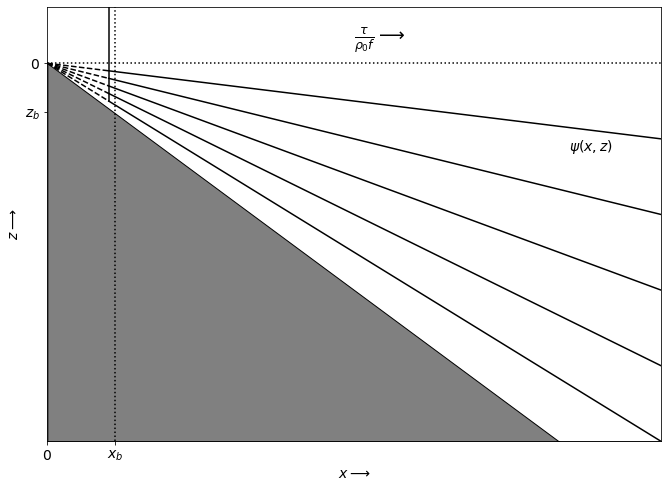

In [3]:
# Make figure
fig, ax = plt.subplots(figsize=(11, 8))

# Axis formatting
ax.set_xlim([0, 1])
ax.set_ylim([-1, 0.15])
ax.set_xlabel('$x \longrightarrow$')
ax.set_ylabel('$z \longrightarrow$')

# Tick formatting
ax.xaxis.set_ticks([0, 0.11])
ax.xaxis.set_ticklabels(['$0$', '$x_b$'])
ax.yaxis.set_ticks([-0.13, 0])
ax.yaxis.set_ticklabels(['$z_b$', '$0$'])

# Content
x = np.array([0.11, 1])
for s in np.arange(-1, 0, 0.2):
    for x, style in zip([[0, 0.1], [0.1, 1]], ['--', '-']):
        ax.plot(x, s*np.array(x), 'k', linestyle=style)

ax.fill_between([0, 1], [0, -1.2], -1, facecolor='gray', edgecolor='k')
ax.plot([0, 1], [0, 0], 'k:')
ax.plot([0.1, 0.1], [-0.1, 0.15], 'k-')
ax.plot([0.11, 0.11], [-1, 0.15], 'k:')
ax.text(0.5, 0.92, '$\\frac{\\tau}{\\rho_0f} \longrightarrow$', transform=ax.transAxes, size=18)
ax.text(0.85, 0.67, '$\psi(x, z)$', transform=ax.transAxes)

plt.show()

#fig.savefig('/home/bmoorema/Desktop/theory_fig.pdf', bbox_inches='tight')

***

## Functions and definitions

In [18]:
# Definitions
f, g, rho_0, H = 1e-4, 9.81, 1e3, 1e2

***

## Theoretical models

### Surface layer pycnocline response

#### Method 1: mass balance

To conserve mass

$$\underbrace{\zeta L_R}_{\text{upwelled area}} = \underbrace{\frac{\tau t}{\rho_0f}}_{\text{Ekman flux}}$$

where $L_R = \sqrt{g'h_s}/f$. Solving for $\zeta/h_s$ gives

$$\frac{\zeta}{h_s} = \frac{\tau}{\rho_0g'h_s}\frac{L_R}{h_s}ft$$

The coefficient of the solution is the inverse of the Wedderburn number

$$W_e = \frac{\rho_0g'h_s}{\tau}\frac{h_s}{L_R}$$

which is commonly used to describe upwelling in lakes.

#### Method 2: 2-layer model

Lower layer baroclinic momentum balance

\begin{align}
-fV & = -g'h_s\frac{\partial\zeta}{\partial x} \\
\frac{\partial V}{\partial t} + fU & = -\frac{\tau}{\rho_0} \\
\frac{\partial\zeta}{\partial t} + \frac{\partial U}{\partial x} & = 0
\end{align}

Linear time solutions

$$\zeta = \zeta_1ft + \zeta_0, \hspace{1cm} V = V_1ft + V_0, \hspace{1cm} U = U_0$$

Substituting (4) into (1) gives the following proportional to $t$

$$-fV_1 = -g'h_s\frac{\partial\zeta_1}{\partial x}$$

and the following constant

\begin{align}
-fV_0 & = -g'h_s\frac{\partial\zeta_0}{\partial x} \\
V_1 + U_0 & = -\frac{\tau}{\rho_0f} \\
f\zeta_1 + \frac{\partial U_0}{\partial x} & = 0
\end{align}

Eliminating variables gives the following equation for $\zeta_1$

$$\frac{\partial^2\zeta_1}{\partial x^2} - \frac{1}{L_R^2}\zeta_1 = 0$$

where $L_R = \sqrt{g'h_s}/f$. At the boundary $U_0\to0$ thus the boundary condition on $\zeta_1$ is

$$\frac{\partial\zeta_1}{\partial x} = -\frac{\tau}{\rho_0g'h_s}$$

The solution for $\zeta_1$ given the boundary condition is

$$\zeta_1 = \frac{\tau L_R}{\rho_0g'h_s}e^{-x/L_R}$$

Assuming $\zeta_0 = 0$, $\zeta$ at $x=0$ scaled by $h_s$ is again the Wedderburn number dependence obtained from the mass balance

$$\frac{\zeta}{h_s} = \frac{\tau}{\rho_0g'h_s}\frac{L_R}{h_s}ft = \frac{ft}{W_e}$$

Plots below demonstrate the pycnocline response in parameter space.

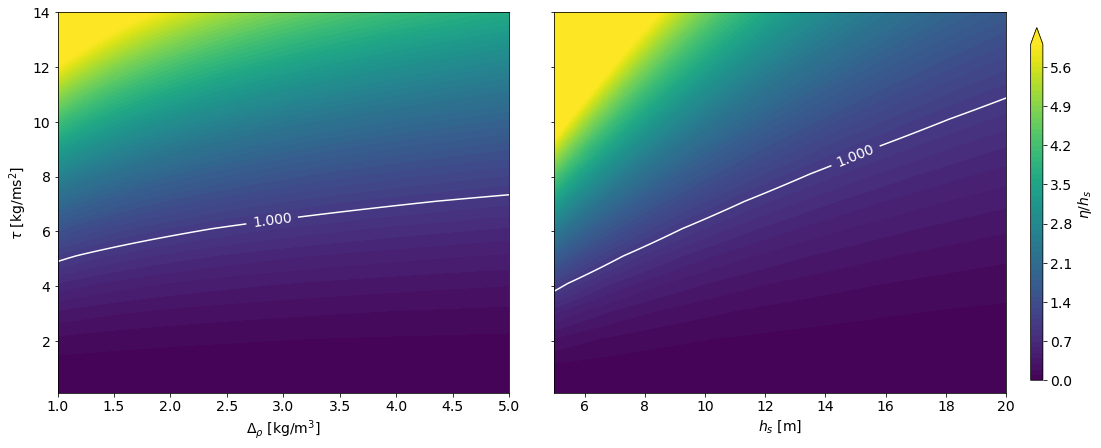

In [5]:
# --- Plot pycnocline displacement in parameter space

# Make figure panels
fig, axs = plt.subplots(1, 2, figsize=(17, 7), gridspec_kw={'wspace': 0.1})

# Panel parameters
x_list = [np.arange(1, 5.1, 0.1), np.arange(5, 20.1, 0.1)]
var_list = ['rho', 'h_s']
labels = ['$\Delta_\\rho$ [kg/m$^3$]', '$h_s$ [m]']
t = 86400

# Loop through panels
for ax, x, var, label in zip(axs, x_list, var_list, labels):

    # Define panel parameter space
    x, U = np.meshgrid(x, np.arange(0.1, 15))
    tau = 1.5e-3 * U**2
    Delta_rho, h_s = 3, 10
    if var == 'rho': Delta_rho = x
    else: h_s = x

    # Calculate pycnocline displacement
    g_prime = g * Delta_rho / rho_0
    L_R = np.sqrt(g_prime * h_s) / f
    W_e = rho_0 * g_prime * h_s / tau * h_s / L_R
    eta = f * t / W_e

    # Plot displacement contours
    c = ax.contourf(x, U, eta, levels=np.arange(0, 6.01, 0.1), extend='max')
    cs = ax.contour(x, U, eta, levels=[1], colors='w')
    ax.clabel(cs)
    ax.set_ylim([0.1, 14])
    ax.set_xlabel(label)

# Final formatting
axs[0].set_ylabel('$\\tau$ [kg/ms$^2$]')
axs[1].yaxis.set_ticklabels('')
cax = fig.add_axes([0.92, 0.15, 0.01, 0.7])
fig.colorbar(c, cax=cax, label='$\\eta/h_s$')
plt.show()

***

### Lower layer continuous stratification response

#### Governing equations

Momentum balance

\begin{align}
-fv & = -\frac{1}{\rho_0}\frac{\partial p}{\partial x} \\
\frac{\partial v}{\partial t} + fu & = 0 \\
\frac{\partial p}{\partial z} + \rho g & = 0\\
\frac{\partial u}{\partial x} + \frac{\partial w}{\partial z} & = 0 \\
\frac{\partial\rho}{\partial t} + u\frac{\partial\rho}{\partial x} + w\frac{\partial\rho}{\partial z} & = 0
\end{align}

Where density is decomposed as

$$\rho = \rho_0 + \rho_*(z) + \rho'(t, x, z)$$

and the onshore transport must balance the offshore surface Ekman transport

$$U = -\frac{\tau}{\rho_0f}$$

#### Scaling arguments

Introducing the following nondimensional variable substitutions

$$t = T\hat{t}, \hspace{0.5cm} x = L\hat{x}, \hspace{0.5cm} z = H\hat{z}, \hspace{0.5cm} u = U\hat{u}, \hspace{0.5cm} w = \frac{UH}{L}\hat{w}, \hspace{0.5cm} \rho' = \Delta\rho\hat{\rho}'$$

and substituting into the density transport equation gives

$$\frac{T_L}{T}\frac{\partial\hat{\rho}'}{\partial\hat{t}} + \hat{u}\frac{\partial\hat{\rho}'}{\partial\hat{x}} + \hat{w}\frac{\partial\hat{\rho}'}{\partial\hat{z}} - \frac{\Delta\rho_H}{\Delta\rho}\hat{w} = 0$$

where

$$T_L = \frac{L}{U}, \hspace{1cm} \Delta\rho_H = \frac{\rho_0N^2H}{g}, \hspace{1cm}  N = \sqrt{-\frac{g}{\rho_0}\frac{\partial\rho_*}{\partial z}}$$

If $T \ll T_L$ and $\Delta\rho \ll \Delta\rho_H$ then the order 1 advection terms are small and disregarded. The density transport equation becomes

$$\frac{\partial\rho}{\partial t} + w\frac{\partial\rho_*}{\partial z} = 0$$

#### Velocity field solution

The streamfunction satisfies the continuity equation

$$u = \frac{\partial\psi}{\partial z}, \hspace{1cm} w = -\frac{\partial\psi}{\partial x}$$

Combining the governing equations to eliminate variables gives

$$\left(\frac{N}{f}\right)^2\frac{\partial^2\psi}{\partial x^2} + \frac{\partial^2\psi}{\partial z^2} = 0$$

Transforming to polar coordinates allows a solution over a wedge topography

$$\frac{1}{r}\frac{\partial}{\partial r}\left(r\frac{\partial\psi}{\partial r}\right) + \frac{1}{r^2}\frac{\partial^2\psi}{\partial\theta^2} = 0$$

where

$$r = \sqrt{x^2 + \left(\frac{Nz}{f}\right)^2}, \hspace{1cm} \theta = \tan^{-1}\left(\frac{Nz}{fx}\right)$$

The transport boundary condition and the streamfunction definition together imply that the difference in $\psi$ across the lower layer is equal to the surface Ekman flux

$$\psi(r, 0) = 0, \hspace{1cm} \psi(r, \phi) = \frac{\tau}{\rho_0f}$$

where $\phi=\tan^{-1}S$ is the angle of the bottom boundary and $S=\alpha N/f$ is the slope Burger number given bottom slope $\alpha$. Assuming no radial dependence, the equation for $\psi$ is simply a linear function of $\theta$, or in Cartesian coordinates

$$\psi = -\frac{\tau}{\rho f}\frac{1}{\tan^{-1}S}\tan^{-1}\left(\frac{Nz}{fx}\right)$$

The cross-shore velocities are
\begin{align}
u = \frac{\partial\psi}{\partial z} & = -\frac{\tau}{\rho N\tan^{-1}S}\left(\frac{x}{z^2 + \left(fx/N\right)^2}\right) \\
w = -\frac{\partial\psi}{\partial x} & = -\frac{\tau}{\rho N\tan^{-1}S}\left(\frac{z}{z^2 + \left(fx/N\right)^2}\right)
\end{align}

#### Density field solution

*This part is contentious because we use a different density transport equation from the velocity solution*

Return to the full density transport equation ($u$ and $w$ are now known)

$$\frac{\partial\rho}{\partial t} + u\frac{\partial\rho}{\partial x} + w\frac{\partial\rho}{\partial z} = 0$$

We also know the initial profile

$$\rho(x, z, 0) = \rho_*(z) + \rho_0 = \rho_0\left(1 + \frac{N^2z}{g}\right)$$

Since this is a quasi-linear, first-order PDE, we use the Method of Characteristics. Let $s$ be a manifold in $x, z, t, \rho$ space. Along this manifold, the total derivative with respect to $s$ is

$$\frac{d}{ds}\rho(x(s), z(s), t(s)) = \frac{dt}{ds}\frac{\partial\rho}{\partial t} + \frac{dx}{ds}\frac{\partial\rho}{\partial x} + \frac{dz}{ds}\frac{\partial\rho}{\partial z}$$

If the $s$ derivatives are defined as the coefficients of the density transport equation, then

$$\frac{d\rho}{ds} = \frac{\partial\rho}{\partial t} + u\frac{\partial\rho}{\partial x} + w\frac{\partial\rho}{\partial z} = 0$$

and solving $\rho$ amounts to solving the system of ODEs given by the coefficients

$$\frac{dt}{ds} = 1, \hspace{1cm} \frac{dx}{ds} = u, \hspace{1cm} \frac{dz}{ds} = w$$

Since $d\rho/ds = 0$, $\rho$ can be determined from any known set of values along a given $(x, z, t)$ curve through $s$. These values are given as the initial density profile at $(z_0, 0)$

$$\rho(z_0, 0) = \rho_0\left(1 + \frac{N^2z_0}{g}\right)$$

Solving the ODE system, the first equation gives

$$t = s$$

and second and third equations along with the velocity solutions above imply (where $k$ is some integration constant)

$$\frac{1}{x}\frac{dx}{ds} = \frac{1}{z}\frac{dz}{ds} \hspace{1cm} \longrightarrow \hspace{1cm} z = kx$$

Now the ODE for $z$ is (substituting $z = kx$)

$$\frac{dz}{ds} = w = -\frac{1}{z}\frac{\tau}{\rho_0N\phi}\left(\frac{1}{1 + \left(f/kN\right)^2}\right)$$

which is separable and has the following solution

$$z^2 = z_0^2 - \frac{2\tau s}{\rho_0N\phi}\left(\frac{1}{1 + \left(f/kN\right)^2}\right)$$

where from the previous ODE system solutions, $s = t$ and $k = z/x$. Rearranging for $z_0$ and substituting into $\rho(z_0, 0)$ gives the complete solution for $\rho$

$$\rho(x, z, t) = \rho_0\left(1 + \frac{N^2z}{g}\sqrt{1 + \frac{2\tau t}{\rho_0N\phi}\left(\frac{1}{z^2 + \left(fx/N\right)^2}\right)}\right)$$

The density field and streamfunction solutions are shown plotted below

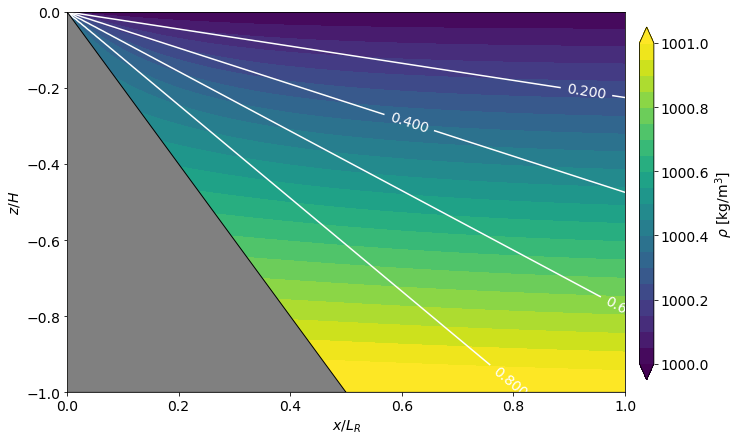

In [71]:
# --- Plot density and streamline cross-section after 1 day

# Make figure panels
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_xlim([0, 1])
ax.set_ylim([-1, 0])
ax.set_xlabel('$x/L_R$')
ax.set_ylabel('$z/H$')

# Define parameters
tau, N, alpha, t = 0.1, 0.01, 0.02, 86400
S = alpha * N / f
L_R = N * H / f

# Make plot arrays
xi = np.arange(1, L_R)
zi = np.concatenate((np.arange(-H, 0), np.arange(-0.9, 0, 0.1)))
x, z = np.meshgrid(xi, zi)

# Calculate streamfunction and density fields
psi = -tau / (rho_0 * f * np.arctan(S)) * np.arctan(N * z / (f * x))
rho_star = -rho_0 * N**2 * z / g
rho = rho_star * np.sqrt(1 + 2 * tau * t / (rho_0 * N * np.arctan(S)) / (z**2 + (f * x / N)**2)) + rho_0

# Plot fields
c = ax.contourf(x/L_R, z/H, rho, levels=np.arange(1000, 1001.01, 0.05), extend='both')
cs = ax.contour(x/L_R, z/H, psi, levels=np.arange(0.2, 1, 0.2), colors='w')
ax.fill_between(xi/L_R, -alpha * xi / H, -1, facecolor='gray', edgecolor='k', zorder=10)
ax.clabel(cs)

# Formatting
cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(c, cax=cax, label='$\\rho$ [kg/m$^3$]', ticks=np.arange(1000, 1001.1, 0.2), format='%.1f')
plt.show()

#### Depth of upwelling

Density along the bottom

$$\rho_b(x, t) = \rho(x, z_b, t)$$

where $z_b = -\alpha x$. Evaluating at $x=0$, the upwelled density at the coast is

$$\rho_b(0, t) = \rho_0\left(1 + \frac{N^2}{g}\sqrt{\frac{\tau t}{\rho_0N\tan^{-1}S}\left(\frac{2S^2}{1 + S^2}\right)}\right)$$

Equating $\rho_b(0, t)$ to the initial density field $\rho(x, z, 0)$ and solving for $z = -h_u$ gives the depth of upwelling

$$\frac{h_u}{H} = \sqrt{\frac{\tau t}{\rho_0NH^2\tan^{-1}S}\left(\frac{2S^2}{1 + S^2}\right)}$$

There are dynamic similarities between this metric and the surface layer

$$\frac{h_u}{H} = \sqrt{\frac{\tau}{\rho_0c^2}\frac{L_R}{H}\frac{ft}{\tan^{-1}S}\left(\frac{2S^2}{1 + S^2}\right)}$$

where $c = NH$ and $L_R = c / f$. Here we note the presence of terms analogous to the Wedderburn number

\begin{align}
W_{s} & = \frac{\rho_0g'h_s}{\tau}\frac{h_s}{L_{R_s}} \\
W_{d} & = \frac{\rho_0c^2}{\tau}\frac{H}{L_{R_d}}
\end{align}

Below is a plot of upwelling depth vs Burger number

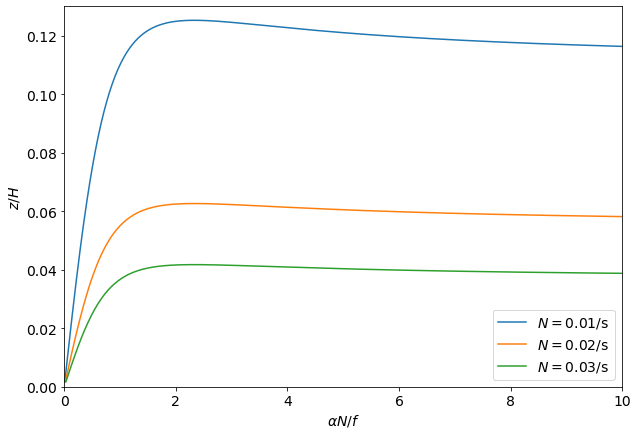

In [85]:
# --- Plot upwelling depth vs Burger number after 1 day

# Make figure panels
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_xlim([0, 10])
ax.set_ylim([0, 0.13])
ax.set_xlabel('$\\alpha N/f$')
ax.set_ylabel('$z/H$')

# Define parameters
tau, N, t = 0.1, 0.01, 86400
alpha = np.arange(0.0001, 0.1, 0.0001)

# Loop through N values
for N in [0.01, 0.02, 0.03]:

    # Calculate and plot upwelling depth
    S = alpha * N / f
    h = tau * t / (rho_0 * N * H**2 * np.arctan(S)) * 2 * S**2 / (1 + S**2)
    ax.plot(S, h, label=f'$N = {N:.2f}/$s')

# Formatting
ax.legend()
plt.show()

***

### Lower layer continuous stratification response (full advection)

#### Governing equations

Momentum balance

\begin{align}
-fv & = -\frac{1}{\rho_0}\frac{\partial p}{\partial x} \\
\frac{\partial v}{\partial t} + u\frac{\partial u}{\partial x} + w\frac{\partial u}{\partial z} + fu & = -\frac{1}{\rho_0}\frac{\partial p}{\partial y} \\
\frac{\partial p}{\partial z} + \rho g & = 0\\
\frac{\partial u}{\partial x} + \frac{\partial w}{\partial z} & = 0 \\
\frac{\partial\rho}{\partial t} + u\frac{\partial\rho}{\partial x} + w\frac{\partial\rho}{\partial z} & = 0
\end{align}

The longshore pressure gradient is present to balance the longshore momentum. For simplicity it is prescribed as a constant ($\partial p/\partial y = \delta$) and defined to satisfy geostrophic balance of the cross-shore velocity in the farfield

$$fu = -\frac{1}{\rho_0}\frac{\partial p}{\partial y} \hspace{1cm} \left(\frac{x}{L_R} \gg 1\right)$$

Choboter et al. 2011 found the following solutions

\begin{align}
\psi(\hat{x}, \hat{z}) & = -\frac{\delta}{\mu}\tan^{-1}\left(\coth\mu\hat{x}\tan\mu\hat{z}\right) \\
\hat{v}(\hat{x}, \hat{z}, \hat{t}) & = \delta\hat{t} - \hat{x} -\frac{1}{2\mu}\cosh^{-1}\left(\cosh2\mu\hat{x} + \frac{\sinh^22\mu\hat{x}\left(e^{2\mu\delta\hat{t}} - 1\right)}{\cosh2\mu\hat{x} - \cos2\mu\hat{z}}\right) \\
\hat{\rho}(\hat{x}, \hat{z}, \hat{t}) & = \frac{1}{2\mu}\cos^{-1}\left(\cos2\mu\hat{z} - \frac{\sin^22\mu\hat{z}\left(1 - e^{-2\mu\delta\hat{t}}\right)}{\cosh2\mu\hat{x} - \cos2\mu\hat{z}}\right)
\end{align}

defined over cross-shore topography

$$z_b(\hat{x}) = \frac{1}{\mu}\tan^{-1}\left(\tan\mu\tanh\mu\hat{x}\right)$$

where

$$x = \hat{x}L_R, \hspace{0.5cm} z = \hat{z}H, \hspace{0.5cm} v = \hat{v}c, \hspace{0.5cm} ft = \hat{t}\frac{\rho_0c^2}{\tau}\frac{H}{L_R} \approx \hat{t}W_d$$

and

$$c = NH, \hspace{0.5cm} L_R = \frac{c}{f}, \hspace{0.5cm} S = \tan\mu = \frac{\alpha N}{f}$$

/home/bmoorema/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in true_divide
/home/bmoorema/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in true_divide
/home/bmoorema/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in arccos


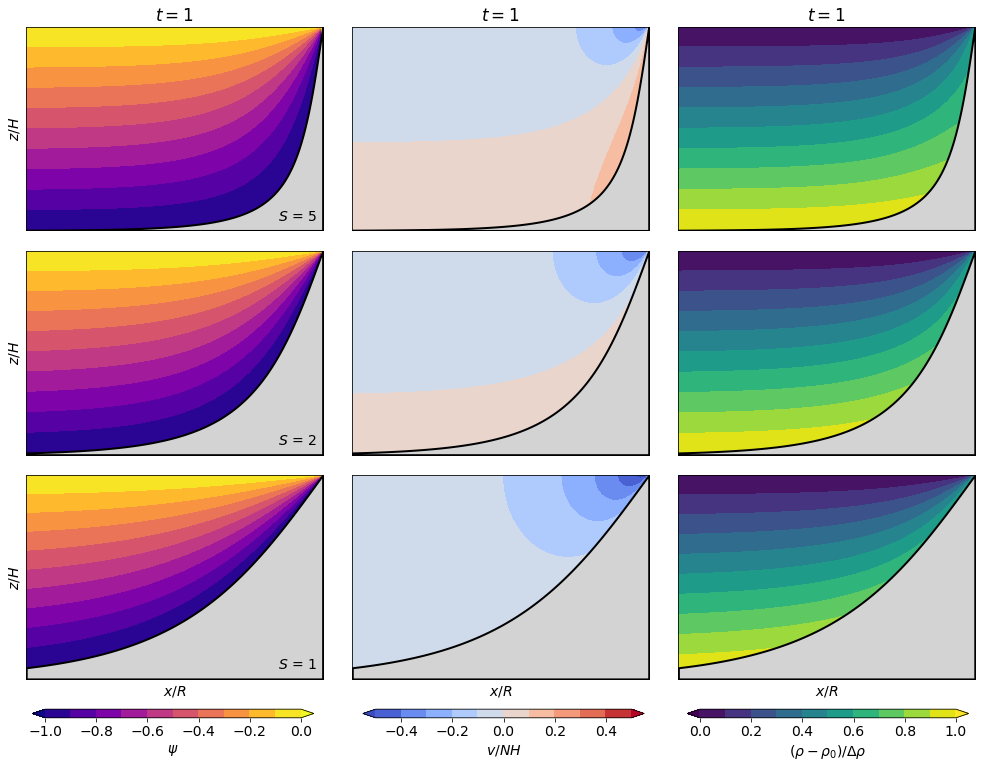

In [88]:
const = {
    'g': 9.81, 'f': 1.11e-4, 'rho_0': 1024, 'H': 200, 'L_R': 5e3, 'z_h': 10,
    'N': 0.001, 'alpha': 1, 'tau': 0.123, 't': 86400,
}

def calc_scales(const, L):
    """
    """

    S = const['N'] * const['H'] / (const['f'] * L)
    T = const['rho_0'] * const['N'] * const['H']**2 / const['tau']
    exp = 2 * const['alpha'] * np.arctan(S) * const['t'] / T
    mu = np.arctan(S)
    
    return S, mu, T, exp

# Make figure layout
fig, axs = plt.subplots(3, 3, figsize=(17, 12), gridspec_kw={'hspace': 0.1, 'wspace': 0.1})

# Define parameters and dimensions
xi, zi = np.arange(-2, 0.01, 0.01), np.arange(-1, 0.01, 0.01)
x, z = np.meshgrid(xi, zi)

# Loop through Burger numbers
for n, row, L in zip(range(3), axs, [3.6e2, 9e2, 1.8e3]):

    # Calculate shared terms
    S, mu, T, exp = calc_scales(const, L)
    denom = np.cosh(2 * mu * x) - np.cos(2 * mu * z)

    # Calculate bathymetry
    z_b = 1 / mu * np.arctan(np.tan(mu) * np.tanh(mu * xi))

    # Calculate solutions
    psi = -const['alpha'] / mu * np.arctan(np.cosh(mu*x) / np.sinh(mu*x) * np.tan(mu*z))
    v = const['alpha'] * const['t'] / T - x - 1 / (2*mu) * \
        np.arccosh(np.cosh(2*mu*x) + np.sinh(2*mu*x)**2 * (np.exp(exp) - 1) / denom)
    rho = 1 / (2*mu) * np.arccos(np.cos(2*mu*z) - np.sin(2*mu*z)**2 * (1 - np.exp(-exp)) / denom)

    # Plot solutions
    row[0].set_ylabel('$z/H$')
    row[0].text(0.85, 0.05, f'$S$ = {S:.0f}', transform=row[0].transAxes, zorder=2)
    variables, labels = [psi, v, rho], ['$\psi$', '$v/NH$', '$(\\rho - \\rho_0)/\\Delta\\rho$']
    levels, cmaps = [[-1, 0.1], [-0.5, 0.6], [0, 1.1]], ['plasma', 'coolwarm', 'viridis']
    for ax, xpos, var, label, level, cmap in zip(row, [0.13, 0.4, 0.665], variables, labels, levels, cmaps):
        c = ax.contourf(x, z, var, levels=np.arange(*level, 0.1), cmap=cmap, extend='both', zorder=0)
        ax.fill_between(xi, z_b, y2=-1, facecolor='lightgray', edgecolor='k', linewidth=2, zorder=1)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        if n == 0: ax.set_title('$t=1$')
        if n == 2:
            ax.set_xlabel('$x/R$')
            cax = fig.add_axes([xpos, 0.08, 0.23, 0.01])
            fig.colorbar(c, cax=cax, orientation='horizontal', label=label)

#### Depth of upwelling

Our goal is to equate the initial density $\rho(z, 0) = -z$ to the surface density at the coast $\rho(0, 0, t)$ and solve for $z$ as the depth of upwelling. But $\rho(0, 0, t)$ is actually discontinuous at the coast, so instead we use the limit of the density along the bottom as $z_b\to0$

$$\lim_{z_b\to0}\rho(z_b, t) = \rho(z, 0) = -z$$

where $x_b = z_b/\tan\mu$ near the coast. Evaluating this limit

$$\lim_{z_b\to0}\rho(z_b, t) = \lim_{z_b\to0}\frac{1}{2\mu}\cos^{-1}\left\{\cos2\mu z_b - \frac{\sin^22\mu z_b\left(1 - e^{-2\alpha\mu t}\right)}{\cosh\frac{2\mu z_b}{\tan\mu} - \cos2\mu z_b}\right\} = \frac{1}{2\mu}\cos^{-1}\left\{1 - \beta\left(1 - e^{-2\alpha\mu t}\right)\right\}$$

where (using L'H&ocirc;pital's Rule)

$$\beta = \lim_{z_b\to0}\frac{\frac{\partial}{\partial z_b}\left(\sin^22\mu z_b\right)}{\frac{\partial}{\partial z_b}\left(\cosh\frac{2\mu z_b}{\tan\mu} - \cos2\mu z_b\right)} = \lim_{z_b\to0}\frac{\frac{\partial}{\partial z_b}\left(2\cos2\mu z_b\sin2\mu z_b\right)}{\frac{\partial}{\partial z_b}\left(\frac{1}{\tan\mu}\sinh\frac{2\mu z_b}{\tan\mu} + \sin2\mu z_b\right)} = \lim_{z_b\to0}\frac{2\left(\cos^22\mu z_b - \sin^22\mu z_b\right)}{\frac{1}{\tan^2\mu}\cosh\frac{2\mu z_b}{\tan\mu} + \cos2\mu z_b} = \frac{2}{\frac{1}{\tan^2\mu} + 1}$$

Evaluating the intial expression and subsituting $S = \tan\mu$

$$\boxed{\hspace{0.5cm}z = -\frac{1}{2\mu}\cos^{-1}\left\{1 - \frac{2S^2}{1 + S^2}\bigg(1 - e^{-2\alpha\mu t}\bigg)\right\}\hspace{0.5cm}}$$

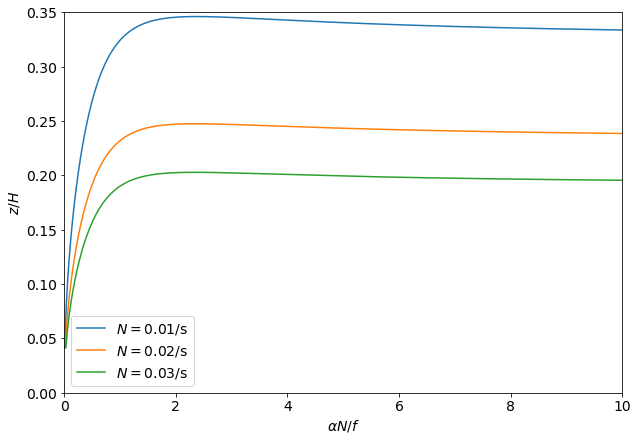

In [95]:
# --- Plot upwelling depth vs Burger number after 1 day

# Make figure panels
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_xlim([0, 10])
ax.set_ylim([0, 0.35])
ax.set_xlabel('$\\alpha N/f$')
ax.set_ylabel('$z/H$')

# Define parameters
tau, N, t = 0.1, 0.01, 86400
alpha = np.arange(0.0001, 0.1, 0.0001)

# Loop through N values
for N in [0.01, 0.02, 0.03]:

    # Calculate and plot upwelling depth
    S = alpha * N / f
    T = rho_0 * N * H**2 / tau
    mu = np.arctan(S)
    h = 1 / (2 * np.arctan(S)) * np.arccos(1 - 2 * S**2 / (1 + S**2) * (1 - np.exp(-2 * mu * t/T)))
    ax.plot(S, h, label=f'$N = {N:.2f}/$s')

# Formatting
ax.legend()
plt.show()